In [1]:
import math
import numpy as np
import wandb

import torch
import torch_geometric
from torch_geometric.data import Data

import pprint
import itertools

import sys
import os

# Add the 'scripts' directory to the Python path
scripts_path = os.path.abspath(os.path.join('..'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Now you can import the gnn_io module
import gnn_io as gio

import joblib
from sklearn.preprocessing import MinMaxScaler
import torch

## 2. Load data

In [2]:
scaler = joblib.load('../training/y_scaler.pkl')

In [22]:
# Load the list of dictionaries
data_dict_list = torch.load('../../data/train_data/dataset_1pm_0-2600_16_07.pt')

# Reconstruct the Data objects
datalist = [Data(x=d['x'], edge_index=d['edge_index'], pos=d['pos'], y=d['y']) for d in data_dict_list]

dataset_only_relevant_dimensions = gio.cut_dimensions(dataset=datalist, indices_of_dimensions_to_keep=[0, 1, 2, 3])
dataset_normalized = gio.normalize_dataset(dataset_only_relevant_dimensions)

In [31]:
baseline_error = gio.compute_baseline_of_no_policies(dataset_normalized)
print(f'Baseline error: {baseline_error}')

baseline_error = gio.compute_baseline_of_mean_target(dataset_normalized)
print(f'Baseline error: {baseline_error}')

In [7]:
# Instantiate the MSELoss function
mse_loss = torch.nn.MSELoss(reduction='none')

# Compute the MSE
base_case_values = np.concatenate([data.x[:, 1] for data in dataset_normalized]).reshape(-1, 1)
target_tensor = np.concatenate([data.y for data in dataset_normalized])

# Convert numpy arrays to torch tensors
base_case_values_tensor = torch.tensor(base_case_values, dtype=torch.float)
target_tensor = torch.tensor(target_tensor, dtype=torch.float)

mse = mse_loss(base_case_values_tensor, target_tensor)
print(mse.item())

In [16]:
base_case_values

array([[0.03830726],
       [0.04953871],
       [0.01083033],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]], dtype=float32)

In [17]:
target_tensor

tensor([[ 0.9259],
        [-0.1481],
        [ 2.0000],
        ...,
        [ 0.0000],
        [ 0.0000],
        [ 0.0000]])

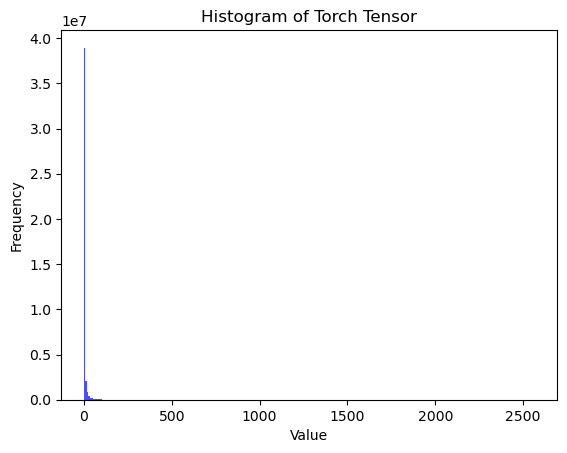

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# Convert to NumPy array
array = mse.numpy()

# Plot histogram
plt.hist(array, bins=300, alpha=0.7, color='blue')
plt.title('Histogram of Torch Tensor')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [10]:
mse.max()

tensor(2566.9351)

In [14]:
sqrt_mse = torch.sqrt(torch.tensor(2566.9351))

In [15]:
sqrt_mse

tensor(50.6649)

In [13]:
mse.min()

tensor(0.)